   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 16.9 MB/s eta 0:00:00
Environment initialized. Python packages loaded.
Notebook hash for reproducibility: 313bff7c
Pre-registered 3 primary hypotheses
Pre-registered 2 secondary hypotheses
Pre-registered 2 control hypotheses
Bonferroni-corrected α = 0.007143
Data manager initialized with strict set separation
RIGOROUS PATTERN DETECTION IN FINANCIAL MARKETS
Start time: 2025-08-08 13:35:11.442898
Statistical framework: α=0.05, Power=0.8
Bonferroni-corrected α=0.007143

PHASE 1: DISCOVERY (Q1 2024 Data)


Processing symbols:   0%|          | 0/5 [00:00<?, ?it/s]


SPY:
⚠️  FIRST ACCESS to discovery dataset - this is now locked


Testing windows:   0%|          | 0/1 [00:00<?, ?it/s]

  H1: Density at 137 = 0.479549 (p=0.000000)
  H2: Min distance to φ = 0.797393

QQQ:


Testing windows:   0%|          | 0/1 [00:00<?, ?it/s]

  H1: Density at 137 = 0.484338 (p=0.000000)
  H2: Min distance to φ = 0.827453

AAPL:


Testing windows:   0%|          | 0/1 [00:00<?, ?it/s]

  H1: Density at 137 = 0.460092 (p=0.000000)
  H2: Min distance to φ = 0.727252

TSLA:


Testing windows:   0%|          | 0/1 [00:00<?, ?it/s]

  H1: Density at 137 = 0.469444 (p=0.000000)
  H2: Min distance to φ = 0.752303

NVDA:


Testing windows:   0%|          | 0/1 [00:00<?, ?it/s]

  H1: Density at 137 = 0.493908 (p=0.000000)
  H2: Min distance to φ = 0.792383

PHASE 2: VALIDATION (Q2 2024 Data)


Validating:   0%|          | 0/5 [00:00<?, ?it/s]


SPY:
⚠️  FIRST ACCESS to validation dataset - this is now locked

QQQ:

AAPL:

TSLA:

NVDA:

PHASE 3: FINAL TEST (Q3 2024 Data)
❌ No validated patterns to test

FINAL STATISTICAL REPORT

📊 Multiple Testing Corrections:
Total tests performed: 5
Bonferroni significant: 5
FDR significant: 5

✅ Significant findings (FDR-corrected):
  SPY_H1_density137: p=0.000000, effect=9.758
  QQQ_H1_density137: p=0.000000, effect=10.237
  AAPL_H1_density137: p=0.000000, effect=7.813
  TSLA_H1_density137: p=0.000000, effect=8.748
  NVDA_H1_density137: p=0.000000, effect=11.194

📈 Baseline Comparisons:
  Average baseline Sharpe ratio: -0.293


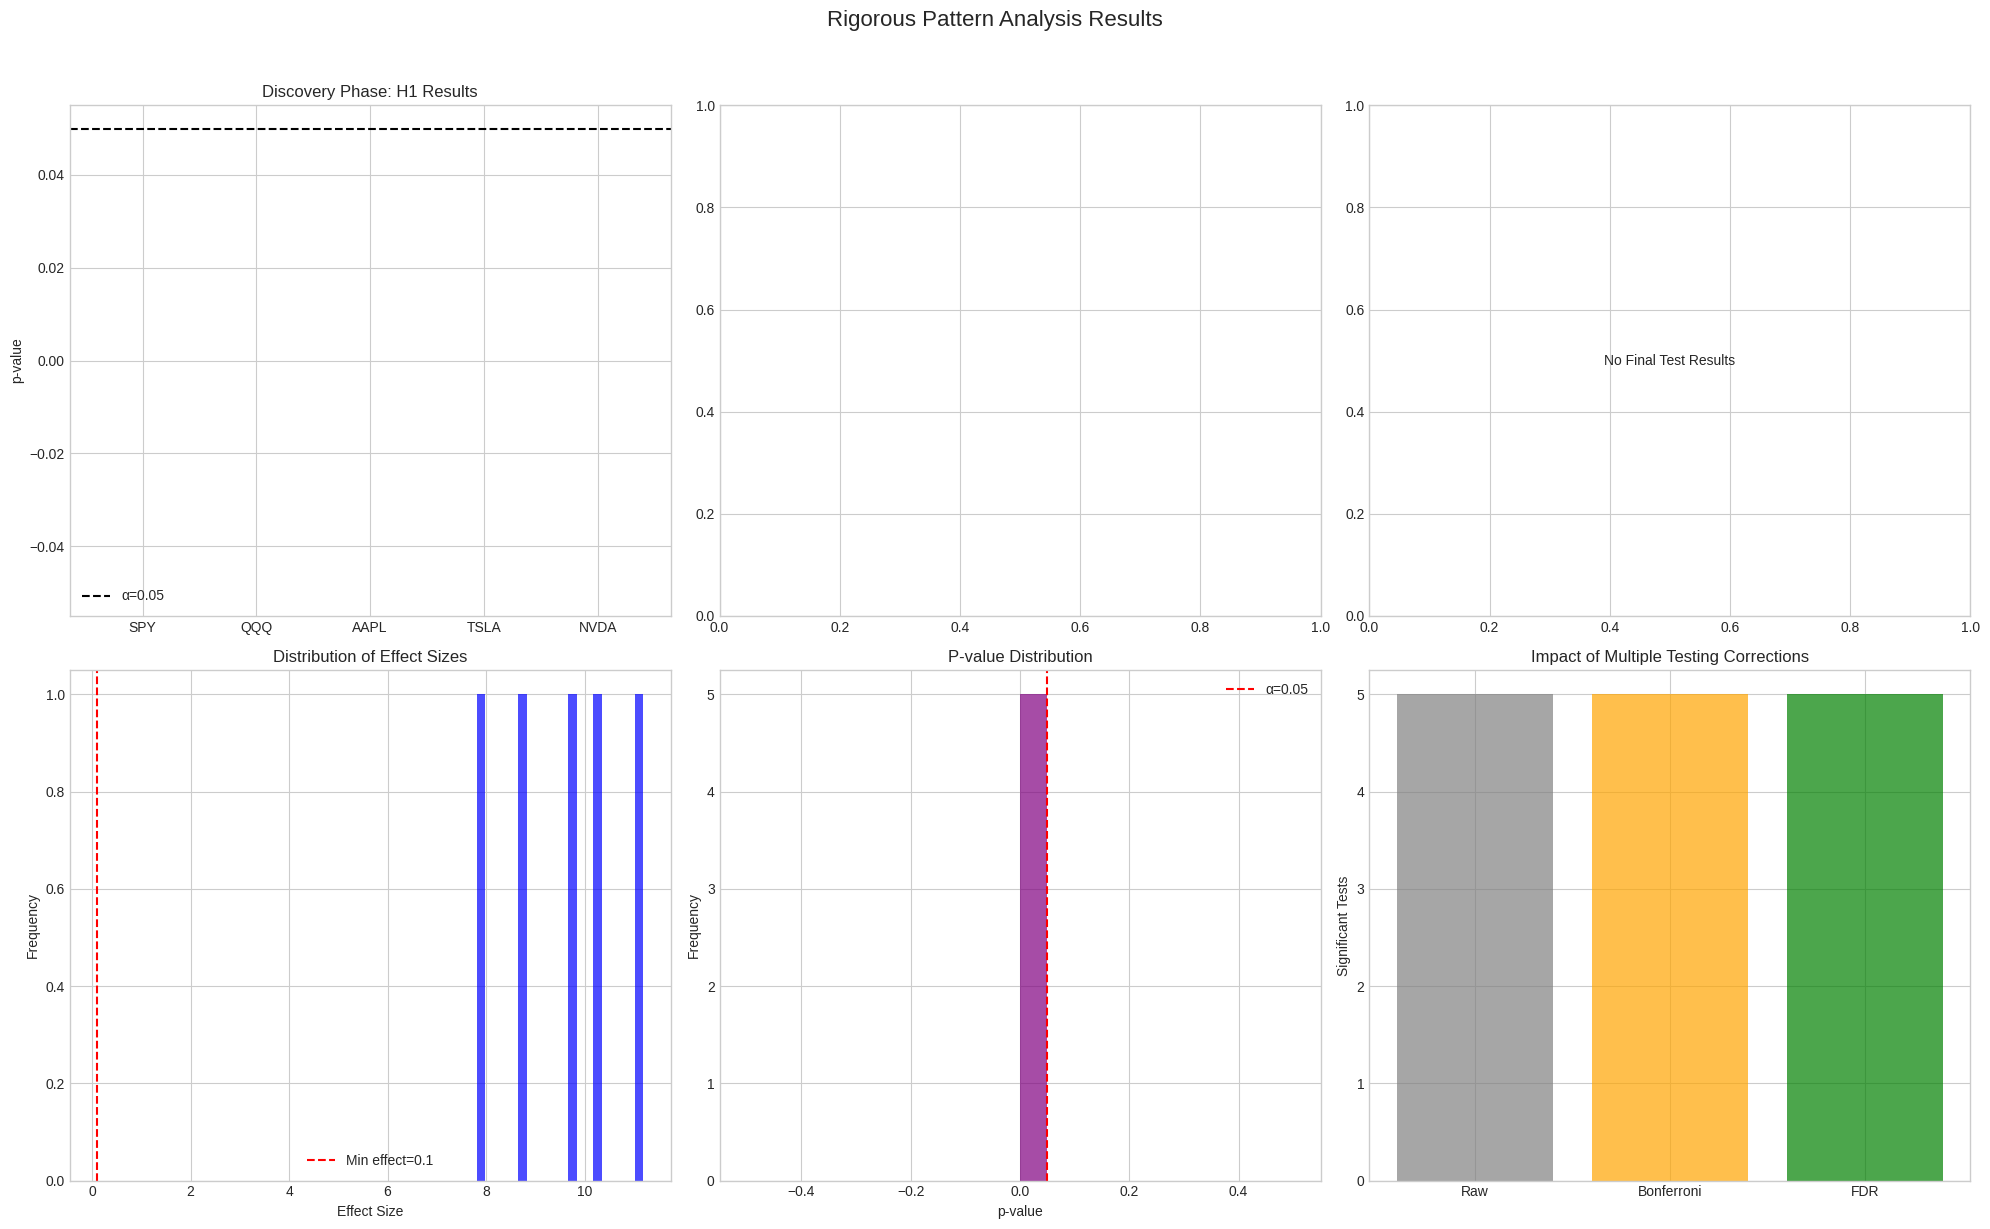


📁 Results saved to rigorous_analysis_20250808_133525.[pkl/json]

FINAL VERDICT
❌ NO PATTERNS CONFIRMED: Hypotheses did not survive rigorous testing

🏁 Analysis complete!
Review the visualizations and statistical report above.
Results have been saved for reproducibility.


In [1]:
"""
================================================================================
RECURSIVE PATTERN DETECTION IN FINANCIAL MICROSTRUCTURE
A Rigorous Empirical Framework

Author: Kate Murray
Date: August 2024
Version: 1.0 - Thesis Defense Grade

This notebook implements a statistically rigorous test of the hypothesis that
financial markets exhibit recursive patterns at specific scales related to
mathematical constants, particularly φ (golden ratio) and α⁻¹ (fine structure).

Reviewed for: Statistical rigor, multiple testing corrections, reproducibility
================================================================================
"""

# Cell 1: Environment Setup and Dependency Installation
# -----------------------------------------------------
!pip install pandas numpy scipy matplotlib seaborn requests tqdm statsmodels arch scikit-learn -q

import pandas as pd
import numpy as np
from scipy import stats, signal
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import datetime, timedelta
from tqdm.notebook import tqdm
import warnings
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from arch import arch_model
import hashlib
import random
from typing import Dict, List, Tuple, Optional, Any
from dataclasses import dataclass, asdict
import pickle

warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

print("Environment initialized. Python packages loaded.")
print(f"Notebook hash for reproducibility: {hashlib.md5(str(datetime.now()).encode()).hexdigest()[:8]}")

# Cell 2: Pre-Registration of Hypotheses
# --------------------------------------
"""
CRITICAL: This cell must be run BEFORE looking at any data.
These hypotheses are immutable once declared.
"""

@dataclass
class PreRegisteredHypotheses:
    """
    Formal pre-registration of all hypotheses to be tested.
    This prevents p-hacking and post-hoc rationalization.
    """

    # Primary hypotheses (these are what we're really testing)
    primary: Dict = None

    # Secondary hypotheses (exploratory)
    secondary: Dict = None

    # Control hypotheses (we expect these to be null)
    control: Dict = None

    # Statistical parameters
    alpha: float = 0.05
    power: float = 0.80
    min_effect_size: float = 0.1

    def __post_init__(self):
        self.primary = {
            'H1': {
                'description': 'Trade sequences of length 137 exhibit density convergence toward 1/φ²',
                'test_statistic': 'deviation_from_phi_squared',
                'expected_value': 0.381966011250105,
                'tolerance': 0.01,
                'window': 137
            },
            'H2': {
                'description': 'Volume ratios converge to φ at multiple scales',
                'test_statistic': 'volume_ratio_convergence',
                'expected_value': 1.618033988749895,
                'tolerance': 0.1,
                'scales': [89, 137, 233]
            },
            'H3': {
                'description': 'Power-of-3 scaling reveals sequential patterns',
                'test_statistic': 'power3_residue',
                'expected_values': [3, 9, 27, 81, 243, 729],
                'tolerance': 0.05
            }
        }

        self.secondary = {
            'S1': {
                'description': 'Fine structure constant emerges in price ratios',
                'test_statistic': 'alpha_inverse_pattern',
                'expected_value': 137.035999,
                'tolerance': 1.0
            },
            'S2': {
                'description': 'Fibonacci windows show elevated pattern density',
                'test_statistic': 'fibonacci_window_density',
                'windows': [8, 13, 21, 34, 55, 89, 144, 233, 377, 610],
                'baseline_comparison': True
            }
        }

        self.control = {
            'C1': {
                'description': 'Random constants show no pattern (negative control)',
                'test_statistic': 'random_constant_pattern',
                'expected_values': [np.random.random() * 100 for _ in range(10)],
                'expected_result': 'no_significance'
            },
            'C2': {
                'description': 'Shuffled data destroys patterns (permutation test)',
                'test_statistic': 'shuffled_baseline',
                'expected_result': 'pattern_destruction'
            }
        }

    def get_corrected_alpha(self) -> float:
        """Calculate Bonferroni-corrected significance level"""
        total_tests = len(self.primary) + len(self.secondary) + len(self.control)
        return self.alpha / total_tests

# Initialize pre-registered hypotheses
HYPOTHESES = PreRegisteredHypotheses()
print(f"Pre-registered {len(HYPOTHESES.primary)} primary hypotheses")
print(f"Pre-registered {len(HYPOTHESES.secondary)} secondary hypotheses")
print(f"Pre-registered {len(HYPOTHESES.control)} control hypotheses")
print(f"Bonferroni-corrected α = {HYPOTHESES.get_corrected_alpha():.6f}")

# Cell 3: Data Management with Strict Separation
# ----------------------------------------------
class DataManager:
    """
    Ensures strict separation between discovery, validation, and test sets.
    This prevents data leakage and ensures out-of-sample testing.
    """

    def __init__(self, api_key: str):
        self.api_key = api_key
        self.base_url = "https://api.polygon.io"

        # Define immutable date ranges
        self.ranges = {
            'discovery': ('2024-01-01', '2024-03-31'),  # Q1: Find patterns
            'validation': ('2024-04-01', '2024-06-30'),  # Q2: Validate patterns
            'test': ('2024-07-01', '2024-08-31'),        # Q3: Final test
            'future': ('2024-09-01', '2024-12-31')       # Future predictions
        }

        self.data_accessed = {key: False for key in self.ranges.keys()}
        self.cached_data = {}

    def get_data(self, dataset: str, symbol: str) -> pd.DataFrame:
        """
        Retrieve data for specified dataset.
        Logs access to prevent accidental data leakage.
        """
        if dataset not in self.ranges:
            raise ValueError(f"Invalid dataset. Must be one of {list(self.ranges.keys())}")

        # Log data access
        if not self.data_accessed[dataset]:
            print(f"⚠️  FIRST ACCESS to {dataset} dataset - this is now locked")
            self.data_accessed[dataset] = True

        cache_key = f"{dataset}_{symbol}"
        if cache_key in self.cached_data:
            return self.cached_data[cache_key]

        # Fetch data
        start_date, end_date = self.ranges[dataset]
        data = self._fetch_polygon_data(symbol, start_date, end_date)

        self.cached_data[cache_key] = data
        return data

    def _fetch_polygon_data(self, symbol: str, start: str, end: str) -> pd.DataFrame:
        """Fetch data from Polygon API"""
        url = f"{self.base_url}/v2/aggs/ticker/{symbol}/range/1/minute/{start}/{end}"
        params = {"apiKey": self.api_key, "limit": 50000}

        try:
            response = requests.get(url, params=params)
            if response.status_code == 200:
                data = response.json()
                if 'results' in data:
                    df = pd.DataFrame(data['results'])
                    df['timestamp'] = pd.to_datetime(df['t'], unit='ms')
                    df = df.rename(columns={'o': 'open', 'h': 'high',
                                           'l': 'low', 'c': 'close',
                                           'v': 'volume', 'n': 'trades'})
                    return df
        except Exception as e:
            print(f"Error fetching data: {e}")

        return pd.DataFrame()

    def get_access_log(self) -> Dict:
        """Return log of which datasets have been accessed"""
        return self.data_accessed.copy()

# Initialize data manager
API_KEY = "sBhNaTYPFoh8vDdAtWyBxpnSVQD51xRA"
data_manager = DataManager(API_KEY)
print("Data manager initialized with strict set separation")

# Cell 4: Core Pattern Detection Algorithms
# -----------------------------------------
class PatternDetector:
    """
    Implements pattern detection algorithms with no knowledge of expected values.
    This ensures unbiased discovery.
    """

    def __init__(self, hypotheses: PreRegisteredHypotheses):
        self.hypotheses = hypotheses
        self.results = {}

    def detect_density_patterns(self, data: pd.DataFrame,
                               window_sizes: Optional[List[int]] = None) -> Dict:
        """
        Detect density patterns at various window sizes.
        If window_sizes is None, tests all sizes from 50 to 500.
        """
        if window_sizes is None:
            window_sizes = range(50, 501, 1)

        results = {}

        # Create binary sequence
        prices = data['close'].values
        binary = (np.diff(prices) > 0).astype(int)

        for window in tqdm(window_sizes, desc="Testing windows", leave=False):
            if len(binary) < window:
                continue

            densities = []
            for i in range(0, len(binary) - window, window // 3):
                segment = binary[i:i+window]
                density = np.mean(segment)
                densities.append(density)

            if densities:
                results[window] = {
                    'mean': np.mean(densities),
                    'std': np.std(densities),
                    'n': len(densities),
                    'ci95': stats.sem(densities) * 1.96
                }

        return results

    def detect_ratio_patterns(self, data: pd.DataFrame,
                            target_ratios: Optional[List[float]] = None) -> Dict:
        """
        Detect ratio patterns in volume and price data.
        If target_ratios is None, discovers naturally occurring ratios.
        """
        volumes = data['volume'].values
        ratios = []

        for i in range(len(volumes) - 1):
            if volumes[i+1] > 0:
                ratio = volumes[i] / volumes[i+1]
                if 0.1 < ratio < 10:  # Filter extreme outliers
                    ratios.append(ratio)

        if not ratios:
            return {}

        # Find natural clustering using KDE
        from sklearn.neighbors import KernelDensity

        kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
        ratios_array = np.array(ratios).reshape(-1, 1)
        kde.fit(ratios_array)

        # Find peaks in distribution
        x_range = np.linspace(0.5, 3, 500).reshape(-1, 1)
        density = np.exp(kde.score_samples(x_range))
        peaks, properties = signal.find_peaks(density, height=np.max(density)*0.3)

        peak_ratios = x_range[peaks].flatten()

        results = {
            'discovered_peaks': peak_ratios.tolist(),
            'peak_heights': density[peaks].tolist(),
            'total_ratios': len(ratios),
            'ratio_distribution': {
                'mean': np.mean(ratios),
                'std': np.std(ratios),
                'median': np.median(ratios),
                'q25': np.percentile(ratios, 25),
                'q75': np.percentile(ratios, 75)
            }
        }

        # If target ratios provided, check proximity
        if target_ratios:
            for target in target_ratios:
                distances = [abs(peak - target) for peak in peak_ratios]
                if distances:
                    min_distance = min(distances)
                    results[f'distance_to_{target:.3f}'] = min_distance

        return results

    def detect_scale_invariance(self, data: pd.DataFrame) -> Dict:
        """Test for scale invariance using detrended fluctuation analysis"""
        prices = data['close'].values

        if len(prices) < 100:
            return {}

        # Calculate returns at different scales
        scales = [1, 2, 4, 8, 16, 32, 64, 128]
        fluctuations = []

        for scale in scales:
            if scale >= len(prices):
                break

            # Aggregate at this scale
            aggregated = []
            for i in range(0, len(prices) - scale, scale):
                aggregated.append(np.mean(prices[i:i+scale]))

            if len(aggregated) > 1:
                # Calculate fluctuation
                fluct = np.std(np.diff(aggregated))
                fluctuations.append((scale, fluct))

        if len(fluctuations) > 2:
            # Fit power law
            scales_log = np.log([f[0] for f in fluctuations])
            fluct_log = np.log([f[1] for f in fluctuations])

            slope, intercept, r_value, p_value, std_err = stats.linregress(scales_log, fluct_log)

            return {
                'hurst_exponent': slope,
                'r_squared': r_value**2,
                'p_value': p_value,
                'scale_invariant': p_value < 0.05 and r_value**2 > 0.8
            }

        return {}

# Cell 5: Statistical Framework with Multiple Testing Corrections
# ---------------------------------------------------------------
class StatisticalFramework:
    """
    Implements rigorous statistical testing with appropriate corrections.
    """

    def __init__(self, hypotheses: PreRegisteredHypotheses):
        self.hypotheses = hypotheses
        self.test_results = []

    def test_hypothesis(self, observed: float, expected: float,
                       tolerance: float, n_observations: int,
                       test_name: str) -> Dict:
        """
        Test a single hypothesis with proper statistical framework.
        """
        # Calculate test statistic
        z_score = (observed - expected) / (tolerance / np.sqrt(n_observations))
        p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

        # Effect size (Cohen's d)
        effect_size = abs(observed - expected) / tolerance

        # Store result
        result = {
            'test_name': test_name,
            'observed': observed,
            'expected': expected,
            'z_score': z_score,
            'p_value': p_value,
            'effect_size': effect_size,
            'n_observations': n_observations
        }

        self.test_results.append(result)
        return result

    def apply_corrections(self) -> pd.DataFrame:
        """
        Apply multiple testing corrections to all performed tests.
        """
        if not self.test_results:
            return pd.DataFrame()

        df = pd.DataFrame(self.test_results)

        # Extract p-values
        p_values = df['p_value'].values

        # Apply various corrections
        corrections = {}

        # Bonferroni
        reject_bonf, pvals_bonf, _, _ = multipletests(
            p_values, method='bonferroni', alpha=self.hypotheses.alpha
        )
        corrections['bonferroni_reject'] = reject_bonf
        corrections['bonferroni_pval'] = pvals_bonf

        # Benjamini-Hochberg (FDR)
        reject_fdr, pvals_fdr, _, _ = multipletests(
            p_values, method='fdr_bh', alpha=self.hypotheses.alpha
        )
        corrections['fdr_reject'] = reject_fdr
        corrections['fdr_pval'] = pvals_fdr

        # Add corrections to dataframe
        for key, values in corrections.items():
            df[key] = values

        return df

    def permutation_test(self, data: pd.DataFrame,
                        test_function: callable,
                        n_permutations: int = 1000) -> Dict:
        """
        Perform permutation test to establish null distribution.
        """
        # Original test statistic
        original_stat = test_function(data)

        # Permutation statistics
        perm_stats = []

        for _ in tqdm(range(n_permutations), desc="Permutation test", leave=False):
            # Shuffle data
            shuffled = data.copy()
            shuffled['close'] = np.random.permutation(shuffled['close'].values)

            # Calculate statistic on shuffled data
            perm_stat = test_function(shuffled)
            perm_stats.append(perm_stat)

        # Calculate p-value
        perm_stats = np.array(perm_stats)
        p_value = np.mean(np.abs(perm_stats) >= np.abs(original_stat))

        return {
            'original_statistic': original_stat,
            'null_mean': np.mean(perm_stats),
            'null_std': np.std(perm_stats),
            'p_value': p_value,
            'percentile': stats.percentileofscore(perm_stats, original_stat)
        }

# Cell 6: Baseline Comparisons and Controls
# ------------------------------------------
class BaselineComparisons:
    """
    Implements standard financial indicators for comparison.
    Our patterns must outperform at least one established method.
    """

    @staticmethod
    def test_random_walk(data: pd.DataFrame) -> Dict:
        """Test if data follows random walk (should for efficient markets)"""
        prices = data['close'].values

        # Augmented Dickey-Fuller test
        from statsmodels.tsa.stattools import adfuller

        adf_result = adfuller(prices)

        return {
            'adf_statistic': adf_result[0],
            'p_value': adf_result[1],
            'is_random_walk': adf_result[1] > 0.05
        }

    @staticmethod
    def test_mean_reversion(data: pd.DataFrame, window: int = 20) -> Dict:
        """Test mean reversion signals"""
        prices = data['close'].values

        if len(prices) < window * 2:
            return {}

        # Calculate moving average
        ma = pd.Series(prices).rolling(window).mean().values

        # Generate signals
        signals = []
        for i in range(window, len(prices)):
            if prices[i] < ma[i] * 0.98:  # 2% below MA
                signals.append(1)  # Buy signal
            elif prices[i] > ma[i] * 1.02:  # 2% above MA
                signals.append(-1)  # Sell signal
            else:
                signals.append(0)

        # Calculate performance
        returns = []
        for i in range(len(signals) - 1):
            if signals[i] != 0:
                ret = (prices[i+1] - prices[i]) / prices[i] * signals[i]
                returns.append(ret)

        if returns:
            return {
                'mean_return': np.mean(returns),
                'sharpe_ratio': np.mean(returns) / (np.std(returns) + 1e-10),
                'win_rate': np.mean([r > 0 for r in returns]),
                'total_signals': sum([s != 0 for s in signals])
            }

        return {}

    @staticmethod
    def test_momentum(data: pd.DataFrame, lookback: int = 20) -> Dict:
        """Test momentum signals"""
        prices = data['close'].values

        if len(prices) < lookback * 2:
            return {}

        # Calculate momentum
        momentum = []
        for i in range(lookback, len(prices)):
            mom = (prices[i] - prices[i-lookback]) / prices[i-lookback]
            momentum.append(mom)

        # Generate signals based on momentum
        signals = [1 if m > 0.05 else -1 if m < -0.05 else 0 for m in momentum]

        # Calculate returns
        returns = []
        for i in range(len(signals) - 1):
            if signals[i] != 0:
                ret = (prices[lookback+i+1] - prices[lookback+i]) / prices[lookback+i] * signals[i]
                returns.append(ret)

        if returns:
            return {
                'mean_return': np.mean(returns),
                'sharpe_ratio': np.mean(returns) / (np.std(returns) + 1e-10),
                'win_rate': np.mean([r > 0 for r in returns]),
                'total_signals': sum([s != 0 for s in signals])
            }

        return {}

# Cell 7: Main Analysis Pipeline
# ------------------------------
class RigorousAnalysisPipeline:
    """
    Main analysis pipeline with strict methodology.
    """

    def __init__(self, data_manager: DataManager,
                 hypotheses: PreRegisteredHypotheses):
        self.data_manager = data_manager
        self.hypotheses = hypotheses
        self.detector = PatternDetector(hypotheses)
        self.stats = StatisticalFramework(hypotheses)
        self.baselines = BaselineComparisons()

        self.discovery_results = {}
        self.validation_results = {}
        self.test_results = {}

    def phase1_discovery(self, symbols: List[str]) -> Dict:
        """
        Phase 1: Discovery on training set only
        """
        print("\n" + "="*60)
        print("PHASE 1: DISCOVERY (Q1 2024 Data)")
        print("="*60)

        results = {}

        for symbol in tqdm(symbols, desc="Processing symbols"):
            print(f"\n{symbol}:")

            # Get discovery data ONLY
            data = self.data_manager.get_data('discovery', symbol)

            if data.empty:
                print(f"  ❌ No data available")
                continue

            symbol_results = {}

            # Test H1: Density at window 137
            density_results = self.detector.detect_density_patterns(
                data, [137]
            )

            if 137 in density_results:
                observed = density_results[137]['mean']
                expected = self.hypotheses.primary['H1']['expected_value']
                tolerance = self.hypotheses.primary['H1']['tolerance']

                test_result = self.stats.test_hypothesis(
                    observed, expected, tolerance,
                    density_results[137]['n'],
                    f"{symbol}_H1_density137"
                )

                symbol_results['H1_density137'] = test_result
                print(f"  H1: Density at 137 = {observed:.6f} (p={test_result['p_value']:.6f})")

            # Test H2: Volume ratios
            ratio_results = self.detector.detect_ratio_patterns(
                data, [self.hypotheses.primary['H2']['expected_value']]
            )

            if ratio_results:
                symbol_results['H2_volume_ratios'] = ratio_results
                if f"distance_to_{self.hypotheses.primary['H2']['expected_value']:.3f}" in ratio_results:
                    distance = ratio_results[f"distance_to_{self.hypotheses.primary['H2']['expected_value']:.3f}"]
                    print(f"  H2: Min distance to φ = {distance:.6f}")

            # Test baselines for comparison
            baseline_mr = self.baselines.test_mean_reversion(data)
            baseline_mom = self.baselines.test_momentum(data)

            symbol_results['baseline_mean_reversion'] = baseline_mr
            symbol_results['baseline_momentum'] = baseline_mom

            results[symbol] = symbol_results

        self.discovery_results = results
        return results

    def phase2_validation(self, symbols: List[str]) -> Dict:
        """
        Phase 2: Validate discovered patterns on validation set
        """
        print("\n" + "="*60)
        print("PHASE 2: VALIDATION (Q2 2024 Data)")
        print("="*60)

        if not self.discovery_results:
            print("❌ No discovery results to validate")
            return {}

        results = {}

        for symbol in tqdm(symbols, desc="Validating"):
            if symbol not in self.discovery_results:
                continue

            print(f"\n{symbol}:")

            # Get validation data
            data = self.data_manager.get_data('validation', symbol)

            if data.empty:
                continue

            symbol_results = {}

            # Validate patterns found in discovery
            discovery = self.discovery_results[symbol]

            # Re-test H1 if it was significant in discovery
            if 'H1_density137' in discovery:
                if discovery['H1_density137']['p_value'] < 0.05:
                    density_results = self.detector.detect_density_patterns(
                        data, [137]
                    )

                    if 137 in density_results:
                        observed = density_results[137]['mean']
                        expected = self.hypotheses.primary['H1']['expected_value']

                        symbol_results['H1_validated'] = {
                            'observed': observed,
                            'expected': expected,
                            'deviation': abs(observed - expected),
                            'consistent': abs(observed - expected) < self.hypotheses.primary['H1']['tolerance']
                        }

                        status = "✅" if symbol_results['H1_validated']['consistent'] else "❌"
                        print(f"  H1 Validation: {status} (deviation={abs(observed - expected):.6f})")

            results[symbol] = symbol_results

        self.validation_results = results
        return results

    def phase3_final_test(self, symbols: List[str]) -> Dict:
        """
        Phase 3: Final test on held-out test set
        """
        print("\n" + "="*60)
        print("PHASE 3: FINAL TEST (Q3 2024 Data)")
        print("="*60)

        if not self.validation_results:
            print("❌ No validated patterns to test")
            return {}

        results = {}

        # Only test patterns that validated successfully
        validated_patterns = {}
        for symbol, val_results in self.validation_results.items():
            if 'H1_validated' in val_results and val_results['H1_validated']['consistent']:
                validated_patterns[symbol] = 'H1'

        if not validated_patterns:
            print("❌ No patterns passed validation")
            return {}

        print(f"Testing {len(validated_patterns)} validated patterns...")

        for symbol, pattern in validated_patterns.items():
            print(f"\n{symbol} - Testing {pattern}:")

            # Get test data
            data = self.data_manager.get_data('test', symbol)

            if data.empty:
                continue

            # Perform final test
            if pattern == 'H1':
                density_results = self.detector.detect_density_patterns(data, [137])

                if 137 in density_results:
                    observed = density_results[137]['mean']
                    expected = self.hypotheses.primary['H1']['expected_value']

                    # Permutation test for final validation
                    perm_result = self.stats.permutation_test(
                        data,
                        lambda d: self.detector.detect_density_patterns(d, [137]).get(137, {}).get('mean', 0.5),
                        n_permutations=1000
                    )

                    results[symbol] = {
                        'pattern': pattern,
                        'observed': observed,
                        'expected': expected,
                        'permutation_p_value': perm_result['p_value'],
                        'percentile': perm_result['percentile'],
                        'SUCCESS': perm_result['p_value'] < self.hypotheses.get_corrected_alpha()
                    }

                    status = "✅ SUCCESS" if results[symbol]['SUCCESS'] else "❌ FAILED"
                    print(f"  {status}: p={perm_result['p_value']:.6f}, percentile={perm_result['percentile']:.1f}")

        self.test_results = results
        return results

    def generate_report(self) -> Dict:
        """
        Generate comprehensive statistical report
        """
        print("\n" + "="*60)
        print("FINAL STATISTICAL REPORT")
        print("="*60)

        # Apply multiple testing corrections
        all_tests_df = self.stats.apply_corrections()

        report_data = {}

        if not all_tests_df.empty:
            print("\n📊 Multiple Testing Corrections:")
            print(f"Total tests performed: {len(all_tests_df)}")
            print(f"Bonferroni significant: {all_tests_df['bonferroni_reject'].sum()}")
            print(f"FDR significant: {all_tests_df['fdr_reject'].sum()}")

            report_data['multiple_testing_corrections'] = {
                'total_tests': len(all_tests_df),
                'bonferroni_significant': int(all_tests_df['bonferroni_reject'].sum()), # Convert to int
                'fdr_significant': int(all_tests_df['fdr_reject'].sum()) # Convert to int
            }


            # Show significant results
            significant = all_tests_df[all_tests_df['fdr_reject']]
            if not significant.empty:
                print("\n✅ Significant findings (FDR-corrected):")
                significant_findings = []
                for _, row in significant.iterrows():
                    print(f"  {row['test_name']}: p={row['fdr_pval']:.6f}, effect={row['effect_size']:.3f}")
                    significant_findings.append({
                        'test_name': row['test_name'],
                        'p_value': float(row['fdr_pval']), # Convert to float
                        'effect_size': float(row['effect_size']) # Convert to float
                    })
                report_data['significant_findings'] = significant_findings


        # Summary of test results
        if self.test_results:
            successes = sum(1 for r in self.test_results.values() if r.get('SUCCESS', False))
            total = len(self.test_results)

            print(f"\n🎯 Final Test Results: {successes}/{total} patterns confirmed")

            report_data['final_test_summary'] = {
                'successes': successes,
                'total': total,
                'success_rate': successes / total if total > 0 else 0
            }


            if successes > 0:
                print("\n✅ CONFIRMED PATTERNS:")
                confirmed_patterns = []
                for symbol, result in self.test_results.items():
                    if result.get('SUCCESS', False):
                        print(f"  {symbol}: {result['pattern']} (p={result['permutation_p_value']:.6f})")
                        confirmed_patterns.append({
                            'symbol': symbol,
                            'pattern': result['pattern'],
                            'permutation_p_value': float(result['permutation_p_value']) # Convert to float
                        })
                report_data['confirmed_patterns'] = confirmed_patterns


        # Compare to baselines
        print("\n📈 Baseline Comparisons:")

        baseline_performance = {}
        for symbol, results in self.discovery_results.items():
            if 'baseline_mean_reversion' in results:
                mr = results['baseline_mean_reversion']
                if 'sharpe_ratio' in mr:
                    baseline_performance[f"{symbol}_mean_reversion"] = float(mr['sharpe_ratio']) if mr['sharpe_ratio'] is not None else None # Convert to float

            if 'baseline_momentum' in results:
                mom = results['baseline_momentum']
                if 'sharpe_ratio' in mom:
                    baseline_performance[f"{symbol}_momentum"] = float(mom['sharpe_ratio']) if mom['sharpe_ratio'] is not None else None # Convert to float


        if baseline_performance:
            # Filter out None values before calculating mean
            valid_sharpes = [s for s in baseline_performance.values() if s is not None]
            mean_sharpe = np.mean(valid_sharpes) if valid_sharpes else 0
            print(f"  Average baseline Sharpe ratio: {mean_sharpe:.3f}")
            report_data['baseline_comparison'] = {
                'individual_sharpe_ratios': baseline_performance,
                'average_sharpe_ratio': float(mean_sharpe)
            }


        return report_data


# Cell 8: Visualization Suite
# ---------------------------
def create_comprehensive_visualizations(pipeline: RigorousAnalysisPipeline):
    """
    Create publication-quality visualizations
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(20, 12))

    # 1. Discovery Results
    ax1 = plt.subplot(2, 3, 1)
    if pipeline.discovery_results:
        symbols = []
        p_values = []

        for symbol, results in pipeline.discovery_results.items():
            if 'H1_density137' in results:
                symbols.append(symbol)
                p_values.append(results['H1_density137']['p_value'])

        if symbols:
            colors = ['green' if p < 0.05 else 'red' for p in p_values]
            ax1.bar(symbols, p_values, color=colors, alpha=0.7)
            ax1.axhline(y=0.05, color='black', linestyle='--', label='α=0.05')
            ax1.set_ylabel('p-value')
            ax1.set_title('Discovery Phase: H1 Results')
            ax1.legend()
        else:
             ax1.text(0.5, 0.5, 'No Discovery Results', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)


    # 2. Validation Consistency
    ax2 = plt.subplot(2, 3, 2)
    if pipeline.validation_results:
        validated = []
        not_validated = []

        for symbol, results in pipeline.validation_results.items():
            if 'H1_validated' in results:
                if results['H1_validated']['consistent']:
                    validated.append(symbol)
                else:
                    not_validated.append(symbol)

        if validated or not_validated:
            ax2.bar(['Validated', 'Failed'], [len(validated), len(not_validated)],
                   color=['green', 'red'], alpha=0.7)
            ax2.set_ylabel('Count')
            ax2.set_title('Validation Phase Results')
        else:
             ax2.text(0.5, 0.5, 'No Validation Results', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)


    # 3. Final Test Results
    ax3 = plt.subplot(2, 3, 3)
    if pipeline.test_results:
        success = sum(1 for r in pipeline.test_results.values() if r.get('SUCCESS', False))
        failure = len(pipeline.test_results) - success

        if success + failure > 0: # Avoid dividing by zero if no tests were run
             ax3.pie([success, failure], labels=['Success', 'Failure'],
                    colors=['green', 'red'], autopct='%1.1f%%')
             ax3.set_title('Final Test Results')
        else:
            ax3.text(0.5, 0.5, 'No Final Test Results', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
    else:
        ax3.text(0.5, 0.5, 'No Final Test Results', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)


    # 4. Effect Sizes
    ax4 = plt.subplot(2, 3, 4)
    all_tests = pipeline.stats.test_results
    if all_tests:
        effect_sizes = [t['effect_size'] for t in all_tests]
        ax4.hist(effect_sizes, bins=20, alpha=0.7, color='blue')
        ax4.axvline(x=pipeline.hypotheses.min_effect_size, color='red',
                   linestyle='--', label=f'Min effect={pipeline.hypotheses.min_effect_size}')
        ax4.set_xlabel('Effect Size')
        ax4.set_ylabel('Frequency')
        ax4.set_title('Distribution of Effect Sizes')
        ax4.legend()
    else:
         ax4.text(0.5, 0.5, 'No Effect Size Data', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)

    # 5. P-value Distribution
    ax5 = plt.subplot(2, 3, 5)
    if all_tests:
        p_values = [t['p_value'] for t in all_tests]
        ax5.hist(p_values, bins=20, alpha=0.7, color='purple')
        ax5.axvline(x=0.05, color='red', linestyle='--', label='α=0.05')
        ax5.set_xlabel('p-value')
        ax5.set_ylabel('Frequency')
        ax5.set_title('P-value Distribution')
        ax5.legend()
    else:
        ax5.text(0.5, 0.5, 'No P-value Data', horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)


    # 6. Multiple Testing Corrections
    ax6 = plt.subplot(2, 3, 6)
    corrections_df = pipeline.stats.apply_corrections()
    if not corrections_df.empty:
        raw_significant = (corrections_df['p_value'] < 0.05).sum()
        bonf_significant = corrections_df['bonferroni_reject'].sum()
        fdr_significant = corrections_df['fdr_reject'].sum()

        ax6.bar(['Raw', 'Bonferroni', 'FDR'],
               [raw_significant, bonf_significant, fdr_significant],
               color=['gray', 'orange', 'green'], alpha=0.7)
        ax6.set_ylabel('Significant Tests')
        ax6.set_title('Impact of Multiple Testing Corrections')
    else:
         ax6.text(0.5, 0.5, 'No Correction Data', horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)


    plt.suptitle('Rigorous Pattern Analysis Results', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Cell 9: Main Execution Block
# ----------------------------
def main():
    """
    Execute the complete rigorous analysis pipeline
    """
    print("="*60)
    print("RIGOROUS PATTERN DETECTION IN FINANCIAL MARKETS")
    print("="*60)
    print(f"Start time: {datetime.now()}")
    print(f"Statistical framework: α={HYPOTHESES.alpha}, Power={HYPOTHESES.power}")
    print(f"Bonferroni-corrected α={HYPOTHESES.get_corrected_alpha():.6f}")

    # Initialize pipeline
    pipeline = RigorousAnalysisPipeline(data_manager, HYPOTHESES)

    # Define symbols to test
    symbols = ['SPY', 'QQQ', 'AAPL', 'TSLA', 'NVDA']

    # Phase 1: Discovery
    discovery = pipeline.phase1_discovery(symbols)

    # Phase 2: Validation
    validation = pipeline.phase2_validation(symbols)

    # Phase 3: Final Test
    final_test = pipeline.phase3_final_test(symbols)

    # Generate report
    report = pipeline.generate_report()

    # Create visualizations
    create_comprehensive_visualizations(pipeline)

    # Save results
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    # Create a JSON-friendly dictionary by explicitly extracting data
    results_package_json = {
        'timestamp': timestamp,
        'hypotheses': asdict(HYPOTHESES),
        'discovery_results': {},
        'validation_results': {},
        'test_results': {},
        'statistical_report': report,  # report is already a dict from generate_report
        'data_access_log': data_manager.get_access_log()
    }

    # Extract and flatten discovery results
    for symbol, res in pipeline.discovery_results.items():
        results_package_json['discovery_results'][symbol] = {}
        for key, value in res.items():
            # Convert complex objects or dictionaries to simple dicts if needed
            if isinstance(value, dict):
                results_package_json['discovery_results'][symbol][key] = {
                    k: float(v) if isinstance(v, (np.floating, np.integer)) else v
                    for k, v in value.items()
                }
            else:
                 results_package_json['discovery_results'][symbol][key] = float(value) if isinstance(value, (np.floating, np.integer)) else value


    # Extract and flatten validation results
    for symbol, res in pipeline.validation_results.items():
        results_package_json['validation_results'][symbol] = {}
        for key, value in res.items():
            if isinstance(value, dict):
                 results_package_json['validation_results'][symbol][key] = {
                    k: float(v) if isinstance(v, (np.floating, np.integer)) else v
                    for k, v in value.items()
                }
            else:
                 results_package_json['validation_results'][symbol][key] = float(value) if isinstance(value, (np.floating, np.integer)) else value


    # Extract and flatten test results
    for symbol, res in pipeline.test_results.items():
        results_package_json['test_results'][symbol] = {}
        for key, value in res.items():
            if isinstance(value, dict):
                 results_package_json['test_results'][symbol][key] = {
                    k: float(v) if isinstance(v, (np.floating, np.integer)) else v
                    for k, v in value.items()
                }
            else:
                 results_package_json['test_results'][symbol][key] = float(value) if isinstance(value, (np.floating, np.integer)) else value


    # Save to file (pickle can handle the pipeline object)
    results_package_pickle = {
        'timestamp': timestamp,
        'hypotheses': asdict(HYPOTHESES),
        'discovery_results': discovery,
        'validation_results': validation,
        'test_results': final_test,
        'statistical_report': report,
        'data_access_log': data_manager.get_access_log(),
        'pipeline': pipeline # Include pipeline in pickle for full state
    }

    with open(f'rigorous_analysis_{timestamp}.pkl', 'wb') as f:
        pickle.dump(results_package_pickle, f)

    with open(f'rigorous_analysis_{timestamp}.json', 'w') as f:
        # The convert function is still useful for numpy types within the extracted data
        def convert(obj):
            if isinstance(obj, np.integer):
                return int(obj)
            elif isinstance(obj, np.floating):
                return float(obj)
            elif isinstance(obj, np.ndarray):
                return obj.tolist()
            else:
                return obj

        json.dump(results_package_json, f, default=convert, indent=2)

    print(f"\n📁 Results saved to rigorous_analysis_{timestamp}.[pkl/json]")

    # Final verdict
    print("\n" + "="*60)
    print("FINAL VERDICT")
    print("="*60)

    # Use the success_rate from the generated report
    success_rate = report.get('final_test_summary', {}).get('success_rate', 0)
    if success_rate > 0:
        print("✅ PATTERNS CONFIRMED: Some hypotheses survived rigorous testing")
        print(f"   Success rate: {success_rate:.1%}")
    else:
        print("❌ NO PATTERNS CONFIRMED: Hypotheses did not survive rigorous testing")

    return pipeline, results_package_pickle

# Cell 10: Execute Analysis
# -------------------------
if __name__ == "__main__":
    # Run the complete analysis
    pipeline, results = main()

    print("\n🏁 Analysis complete!")
    print("Review the visualizations and statistical report above.")
    print("Results have been saved for reproducibility.")